<div style="background-color: #e6f7ff; padding: 20px; border-radius: 10px; text-align: center; border: 1px solid #b3e0ff;">
    <h1 style="font-size: 2.5em; margin-bottom: 10px; color: #005580;">Project 2</h1>
    <h2 style="font-size: 2em; font-weight: normal; color: #007acc;">(Write Here: MARIAM FAHS)</h2>
</div>


# Introduction

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 8px; border: 1px solid #ddd; margin-bottom: 20px;">
    <h2 style="color: #333;">About the Dataset</h2>
    <p style="font-size: 16px; color: #555;">
        This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
    </p>
</div>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 8px; border: 1px solid #ddd; margin-bottom: 20px;">
    <h2 style="color: #333;">Features</h2>
    <p style="font-size: 16px; color: #555;">There are 25 features:</p>
    <ul style="font-size: 16px; color: #555; line-height: 1.6;">
        <li><strong>ID:</strong> ID of each client</li>
        <li><strong>LIMIT_BAL:</strong> Amount of given credit in NT dollars (includes individual and family/supplementary credit)</li>
        <li><strong>SEX:</strong> Gender (1=male, 2=female)</li>
        <li><strong>EDUCATION:</strong> (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)</li>
        <li><strong>MARRIAGE:</strong> Marital status (1=married, 2=single, 3=others)</li>
        <li><strong>AGE:</strong> Age in years</li>
        <li><strong>PAY_0:</strong> Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)</li>
        <li><strong>PAY_2:</strong> Repayment status in August 2005 (scale same as above)</li>
        <li><strong>PAY_3:</strong> Repayment status in July 2005 (scale same as above)</li>
        <li><strong>PAY_4:</strong> Repayment status in June 2005 (scale same as above)</li>
        <li><strong>PAY_5:</strong> Repayment status in May 2005 (scale same as above)</li>
        <li><strong>PAY_6:</strong> Repayment status in April 2005 (scale same as above)</li>
        <li><strong>BILL_AMT1:</strong> Amount of bill statement in September 2005 (NT dollar)</li>
        <li><strong>BILL_AMT2:</strong> Amount of bill statement in August 2005 (NT dollar)</li>
        <li><strong>BILL_AMT3:</strong> Amount of bill statement in July 2005 (NT dollar)</li>
        <li><strong>BILL_AMT4:</strong> Amount of bill statement in June 2005 (NT dollar)</li>
        <li><strong>BILL_AMT5:</strong> Amount of bill statement in May 2005 (NT dollar)</li>
        <li><strong>BILL_AMT6:</strong> Amount of bill statement in April 2005 (NT dollar)</li>
        <li><strong>PAY_AMT1:</strong> Amount of previous payment in September 2005 (NT dollar)</li>
        <li><strong>PAY_AMT2:</strong> Amount of previous payment in August 2005 (NT dollar)</li>
        <li><strong>PAY_AMT3:</strong> Amount of previous payment in July 2005 (NT dollar)</li>
        <li><strong>PAY_AMT4:</strong> Amount of previous payment in June 2005 (NT dollar)</li>
        <li><strong>PAY_AMT5:</strong> Amount of previous payment in May 2005 (NT dollar)</li>
        <li><strong>PAY_AMT6:</strong> Amount of previous payment in April 2005 (NT dollar)</li>
        <li><strong>default.payment.next.month:</strong> Default payment (1=yes, 0=no)</li>
    </ul>
</div>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 8px; border: 1px solid #ddd;">
    <h2 style="color: #333;">Overview</h2>
    <p style="font-size: 16px; color: #555;">
        You task in this project is to perform all the steps required in the machine learning pipeline to obtain a propoer prediction model of the credit card payment defaulters, including: data cleaning, data analysis, data visualization, and training and evaluation of several machine learning algorithms.
    </p >
    <p style="font-size: 16px; color: #555;">
        We are directing you with the headers and tasks you have to implement to complete this project.
        This notebook consists of the following parts:
    </p>
    <ol style="font-size: 16px; color: #555; line-height: 1.6;">
        <li>Exploratory Data Analysis</li>
        <li>Data Cleaning and Further Exploration</li>
        <li>Building a Base Model</li>
        <li>Feature Engineering</li>
        <li>Building ML Models Using Various Algorithms and Comparing Them</li>
        <li>Conclusion</li>
    </ol>
    <p style="font-size: 20px; color: #011;">
        NOTE: Please don't use ChatGPT or any sort of AI to complete your project. We are aware of how these models generate the answers and this would definitley affect your final grade.
    </p>
</div>


In [3]:
!pip3 install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#Import basic libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('paper')

import plotly.graph_objs as go
# from plotly.subplots import make_subplots
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import plotly.figure_factory as ff 

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)

In [4]:
# Load the data
df = pd.read_csv("./UCI_Credit_Card.csv")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Let's see if the data has any missing values

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### Well it looks like there are no missing values which skips one of the main parts of pre-processing i.e. missing value imputation

#### Now let's check dtypes of each feature

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# 1. Statistical description of the features: [3 points]

##### 1) Numerical features:
- Select the numerical features from the dataset based on the info displayed above
- Print the statistical summary from the numerical features (hind: call describe function)

In [7]:
df.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  PAY

In [8]:
# <write your code here>
num_featurs = ["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2", "BILL_AMT3","BILL_AMT4","BILL_AMT5", "BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
df_num = df[num_featurs]
df_num.describe

<bound method NDFrame.describe of        LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0        20000.0   24     3913.0     3102.0      689.0        0.0        0.0   
1       120000.0   26     2682.0     1725.0     2682.0     3272.0     3455.0   
2        90000.0   34    29239.0    14027.0    13559.0    14331.0    14948.0   
3        50000.0   37    46990.0    48233.0    49291.0    28314.0    28959.0   
4        50000.0   57     8617.0     5670.0    35835.0    20940.0    19146.0   
...          ...  ...        ...        ...        ...        ...        ...   
29995   220000.0   39   188948.0   192815.0   208365.0    88004.0    31237.0   
29996   150000.0   43     1683.0     1828.0     3502.0     8979.0     5190.0   
29997    30000.0   37     3565.0     3356.0     2758.0    20878.0    20582.0   
29998    80000.0   41    -1645.0    78379.0    76304.0    52774.0    11855.0   
29999    50000.0   46    47929.0    48905.0    49764.0    36535.0    32428.0   

     

##### 2) Categorical features:
- Select the categorical features from the dataset based on the info displayed above
- Print the statistical summary from the categorical features (hind: call describe function)

In [9]:
# <write your code here>
cat_features = ["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4", "PAY_6", "default.payment.next.month"]
df_cat=df[cat_features]
df_cat.describe

<bound method NDFrame.describe of        SEX  EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_6  \
0        2          2         1      2      2     -1     -1     -2   
1        2          2         2     -1      2      0      0      2   
2        2          2         2      0      0      0      0      0   
3        2          2         1      0      0      0      0      0   
4        1          2         1     -1      0     -1      0      0   
...    ...        ...       ...    ...    ...    ...    ...    ...   
29995    1          3         1      0      0      0      0      0   
29996    1          3         2     -1     -1     -1     -1      0   
29997    1          2         2      4      3      2     -1      0   
29998    1          3         1      1     -1      0      0     -1   
29999    1          2         1      0      0      0      0      0   

       default.payment.next.month  
0                               1  
1                               1  
2                

#### 3) Rename:
   - the target column to "default"
   - payment status "PAY_0" "PAY_1" to make it continous

In [10]:
# <write your code here>
#ill use 2 ways the first is to create a new column with the new name and assign the values of the target to it then drop inplace the old column
#  (not practical but some time useful)
df["default"]=df["default.payment.next.month"]
df.drop(columns=['default.payment.next.month'], inplace=True)
#or the easy way using Pandas .rename method
df.rename(columns={"PAY_0":"PAY_1"} ,inplace=True)
df.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  PAY

# 2. Exploratory Data Anaysis: [10 points]

#### A) Categorical features:
- In this part of the project, your task is to analyse the categorical features
- You are required to plot some charts

##### 1) Marriage: 
- Extract the different categories of the marriage  (0, 1, 2, and 3) and their value counts (hind: use value_counts)
- Plot a bar graph to show the distribution of the different marriage categories

In [11]:
# <write your code here>
marriage_count=df["MARRIAGE"].value_counts()
marriage_count

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

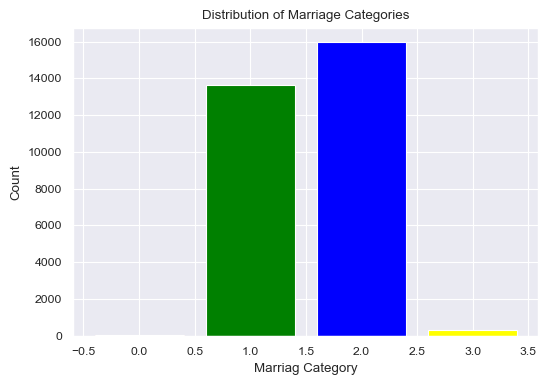

In [12]:
# <write your code here for the plot>
plt.figure(figsize=(6,4))
plt.bar(marriage_count.index,marriage_count.values,color=["blue","green", "yellow","red"])
plt.xlabel("Marriag Category")
plt.ylabel("Count")
plt.title("Distribution of Marriage Categories")
plt.show()

##### What do you think about the obtained plot?

\<write your answer here\>

the number of users who have 0 adn 1 marriage value is very small in compare to 2 and 3 and this is accually logical 

##### 2) Education:
- Extract the different categories of the education  (0, 1, 2, 3, 4, 5 and 6) and their value counts (hind: use value_counts)
- In a seperate dataframe, extract the value count from the dataset of the education
- Name every index as follows:
    - 0 --> University
    - 1 --> Graduate School
    - 2 --> High school
    - 3 --> Unknown 1
    - 4 --> Others
    - 5 --> Unknown 2
    - 6 --> Unknown 3
- Plot a bar graph to show the distribution of the different education categories

In [13]:
# <write your code here>
edu_count=df["EDUCATION"].value_counts()
edu_count

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [16]:
# <write your code here>
edu_labels = {
    0:"University",
    1:"Graduate School",
    2:"High School",
    3:"Unknown 1",
    4:"Others",
    5:"Unknown 2",
    6:"Unknown 3"}

edu_df = pd.DataFrame({
    "Education Category":edu_count.index.map(edu_labels),
    "Count":edu_count.values
})

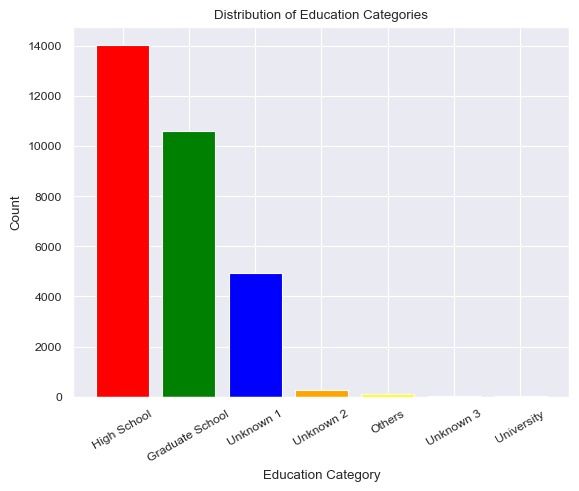

In [17]:
# <write your code here>
#i ploted it using the edu_count then the edu_df as it's labeled 
'''plt.figure(figsize=(8,5))
plt.bar(edu_count.index,edu_count.values, color=["red","green","blue","orange","yellow","purple","black"])
plt.xlabel("Education Category")
plt.ylabel("Count")
plt.title("Distribution of Education Categories")
plt.show()'''

plt.bar(edu_df["Education Category"],edu_df["Count"],color=["red","green","blue","orange","yellow","purple","black"])
plt.xlabel("Education Category")
plt.ylabel("Count")
plt.title("Distribution of Education Categories")
plt.xticks(rotation=30)
plt.show()

##### What do you think about the obtained plot?

\<write your answer here\>

its clear in general but the "unknown" categories are confusing.
but i do find it strange that the "university" category has the lowest count 

##### 3) Sex
- Extract the different categories of the sex (0, and 1) and their value counts (hint: use value_counts)
- Store the dataframe in a separate variable
- Rename the following:
    - 0 to Male
    - 1 to Female
- Plot a bar graph to show the distribution of the different sex categories

In [18]:
# <write your code here>
sex_count =df["SEX"].value_counts()
sex_count

SEX
2    18112
1    11888
Name: count, dtype: int64

im not sure if u want to rename them male/female or 0/1 
and it weird that its 1/2 in the dataset and not 0/1
1-> male ->0
2-> female -> 1

In [19]:
# <write your code here>
sex_labels = {1: "Male",2: "Female"}


sex_df = pd.DataFrame({"Sex Category":sex_count.index.map(sex_labels),"Count":sex_count.values})

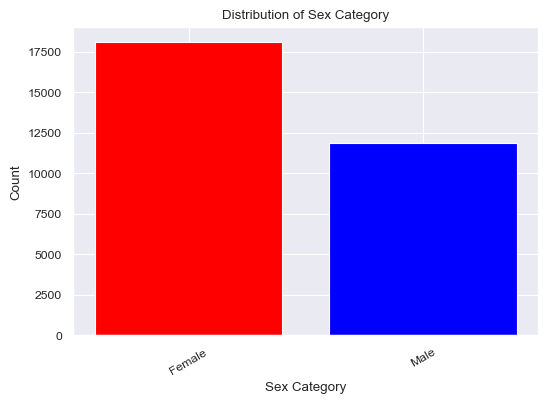

In [20]:
# <write your code here>
plt.figure(figsize=(6,4))
plt.bar(sex_df["Sex Category"], sex_df["Count"], color=["red", "blue"])
plt.xlabel("Sex Category")
plt.ylabel("Count")
plt.title("Distribution of Sex Category")
plt.xticks(rotation=30)
plt.show()

##### What do you think about the obtained plot?

\<write your answer here\>

it very clear in the graph that female count is higher than the male count.

#### B) Numerical variables:
In this section of the project, you need to plot histograms for the different numerical features

##### 1) Bill amount:
- Select the six BILL features and store them in a separate dataframe
- Draw SIX different histograms for each of the feature

In [21]:
# <write your code here>
bills=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
bill_df=df[bills]


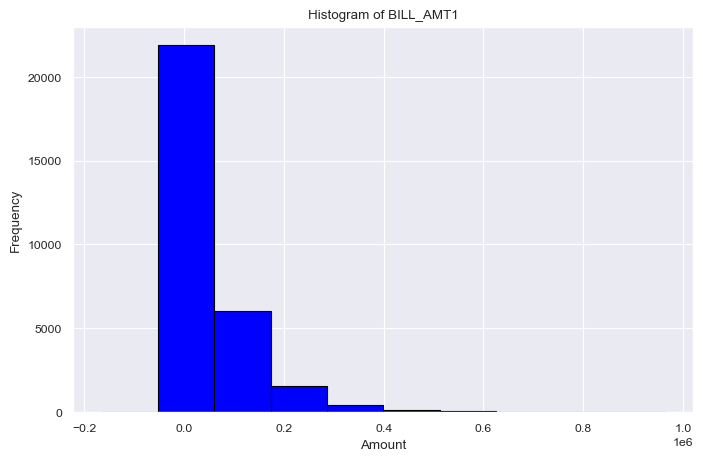

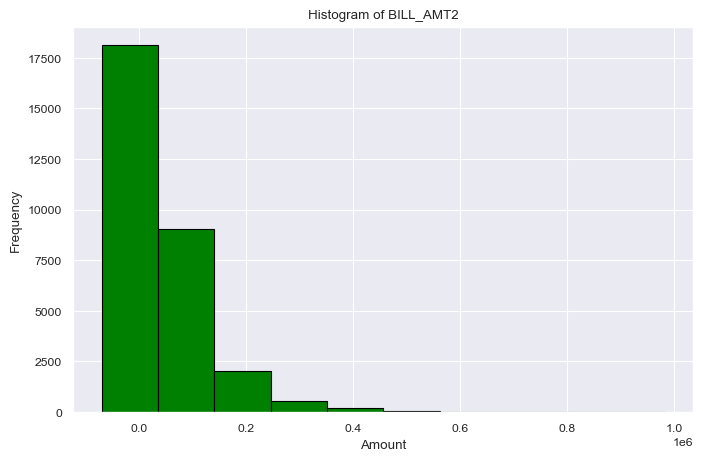

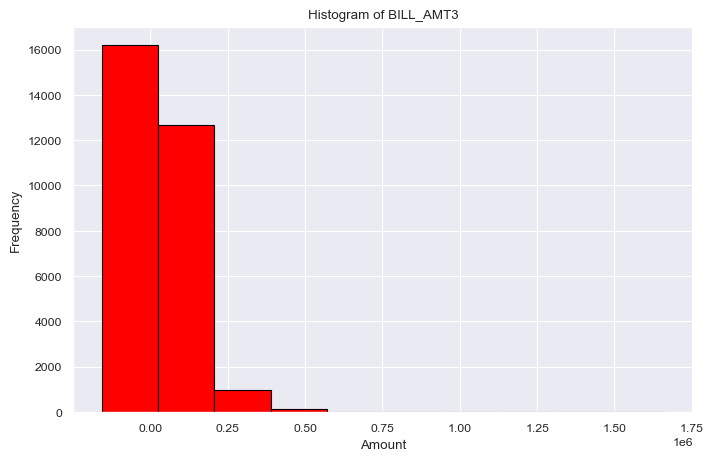

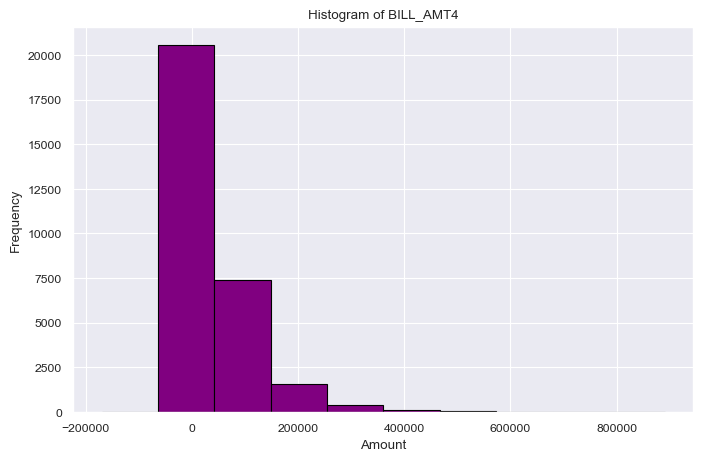

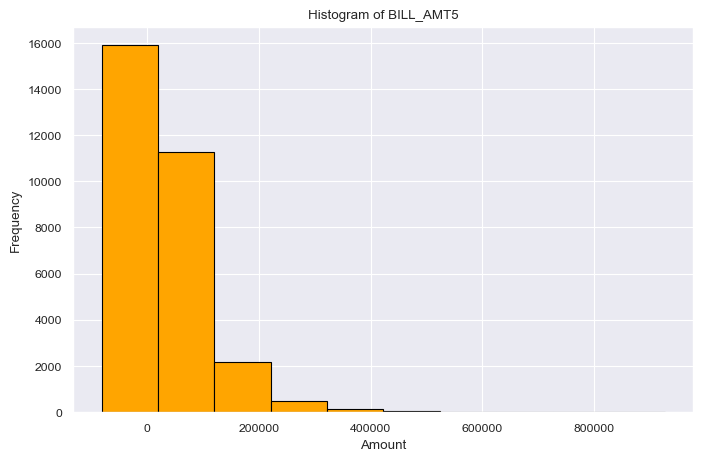

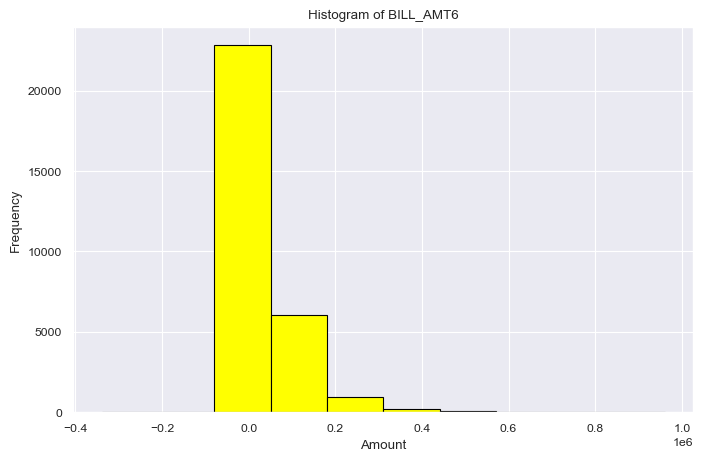

In [24]:
# <write your code here>
plt.figure(figsize=(8,5))
plt.hist(bill_df["BILL_AMT1"],bins=10,color='blue',edgecolor='black')
plt.title("Histogram of BILL_AMT1")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(bill_df["BILL_AMT2"],bins=10,color='green',edgecolor='black')
plt.title("Histogram of BILL_AMT2")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(bill_df["BILL_AMT3"],bins=10, color='red',edgecolor='black')
plt.title("Histogram of BILL_AMT3")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(bill_df["BILL_AMT4"],bins=10, color='purple',edgecolor='black')
plt.title("Histogram of BILL_AMT4")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(bill_df["BILL_AMT5"],bins=10, color='orange',edgecolor='black')
plt.title("Histogram of BILL_AMT5")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(bill_df["BILL_AMT6"],bins=10, color='yellow',edgecolor='black')
plt.title("Histogram of BILL_AMT6")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

##### What do you think about the obtained plot? Any transformation might be required?

\<write your answer here\>

most of the bill amounts shows a similar range and the freq od the higher amounts decreases significantly that means most of the bills are lower end of the scale 
it obvious that some data are not clearly visualized so normalizing and scaling the data is required

##### 2) Previous payment
- Select the six PAY Aount ('PAY_AMT1 --> PAY_AMT6') features and store them in a separate dataframe
- Draw SIX different histograms for each of the feature

In [25]:
# <write your code here>
pay_amt =["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
pay_amt_df= df[pay_amt]

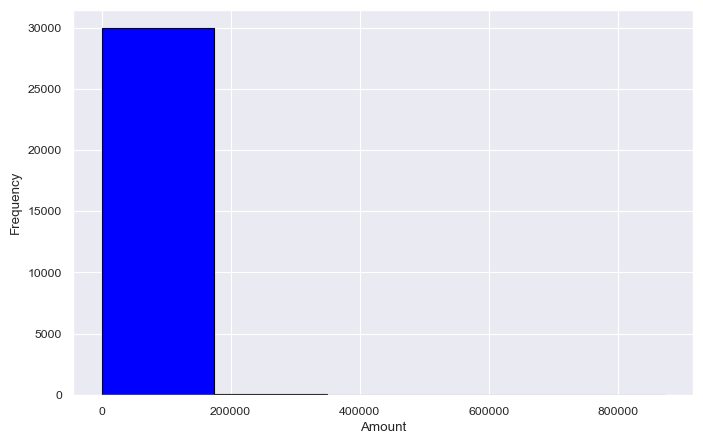

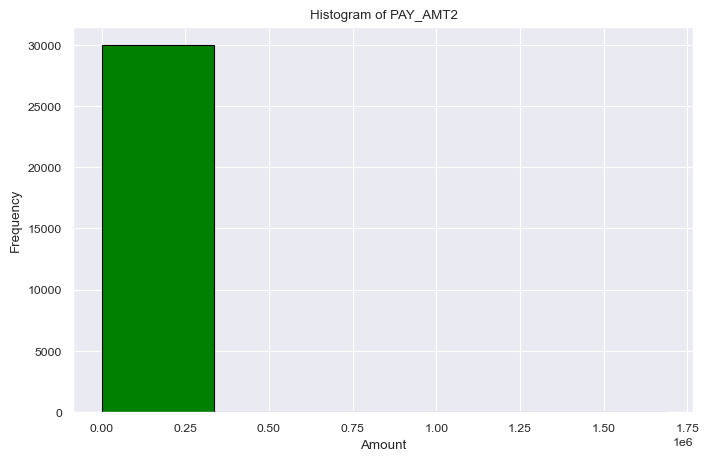

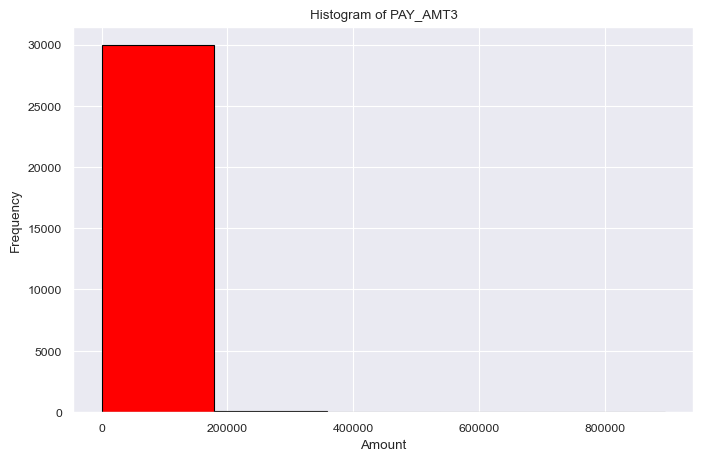

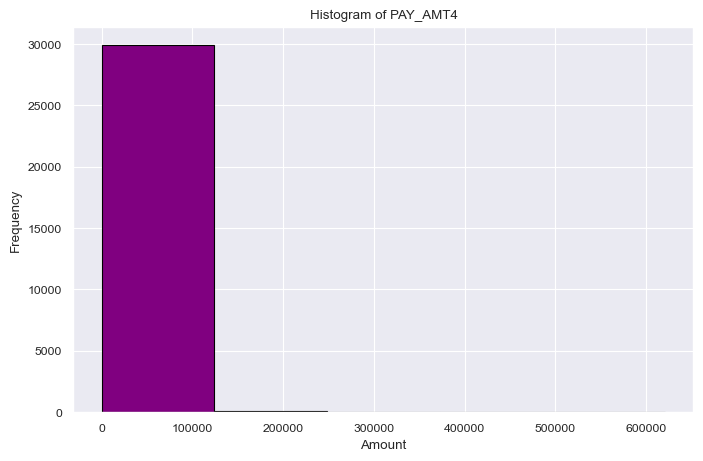

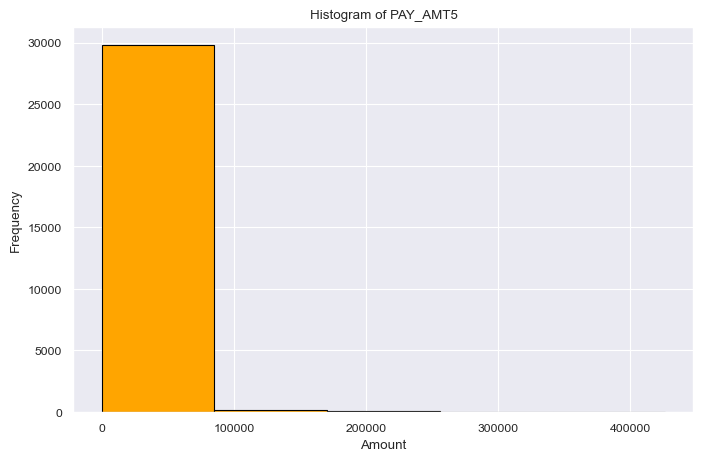

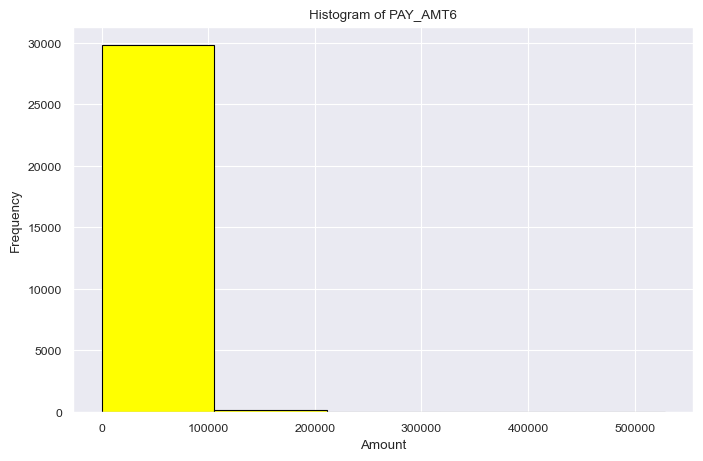

In [26]:
# <write your code here>
plt.figure(figsize=(8,5))
plt.hist(pay_amt_df["PAY_AMT1"],bins=5,color='blue',edgecolor='black')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(pay_amt_df["PAY_AMT2"],bins=5,color='green',edgecolor='black')
plt.title("Histogram of PAY_AMT2")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(pay_amt_df["PAY_AMT3"],bins=5,color='red',edgecolor='black')
plt.title("Histogram of PAY_AMT3")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(pay_amt_df["PAY_AMT4"], bins=5, color='purple', edgecolor='black')
plt.title("Histogram of PAY_AMT4")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(pay_amt_df["PAY_AMT5"], bins=5, color='orange', edgecolor='black')
plt.title("Histogram of PAY_AMT5")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(pay_amt_df["PAY_AMT6"], bins=5, color='yellow', edgecolor='black')
plt.title("Histogram of PAY_AMT6")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

##### What do you think about the obtained plot? Any transformation might be required?

\<write your answer here\>
also here we may need to normalize the data using logarithmic orsquare root transformation to make patterns in the lower range more visible

##### 3) Previous payment status:
- Select the six previous PAY status Aount ('PAY1 --> PAY6') features and store them in a separate dataframe
- Draw SIX different histograms for each of the feature

In [27]:
# <write your code here>
pay = ["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
pay_df = df[pay]


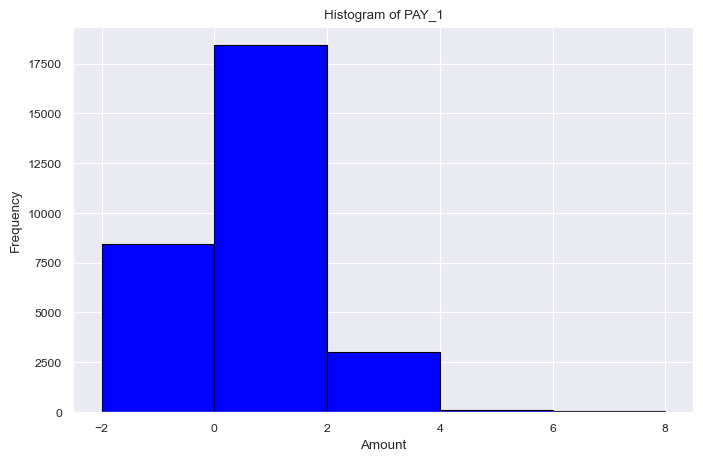

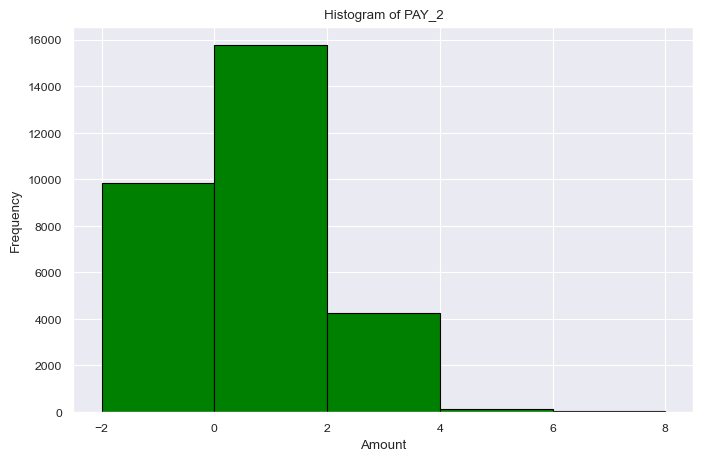

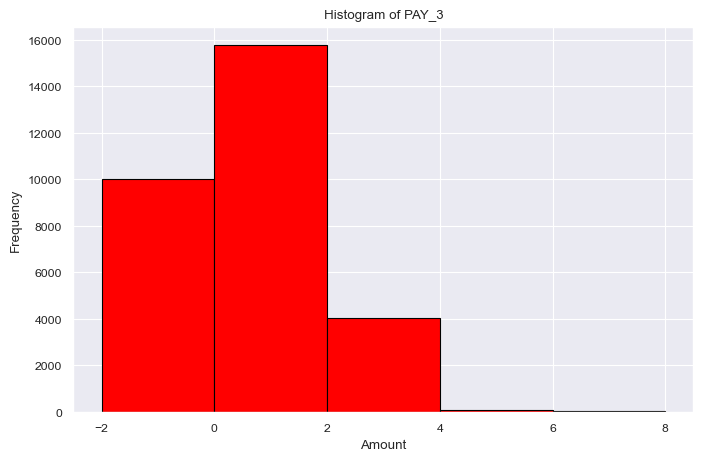

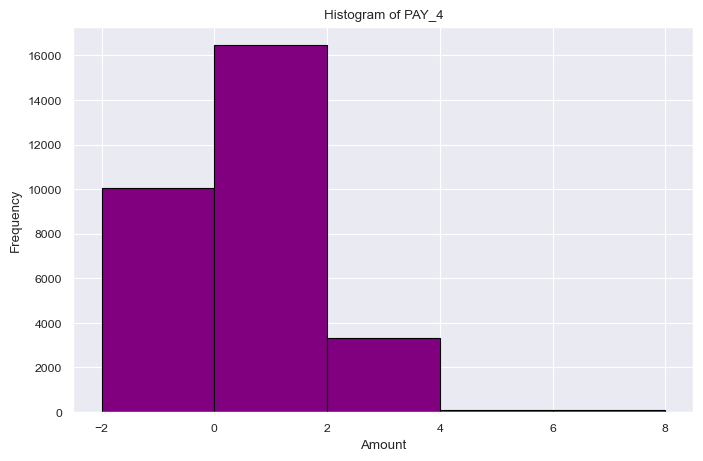

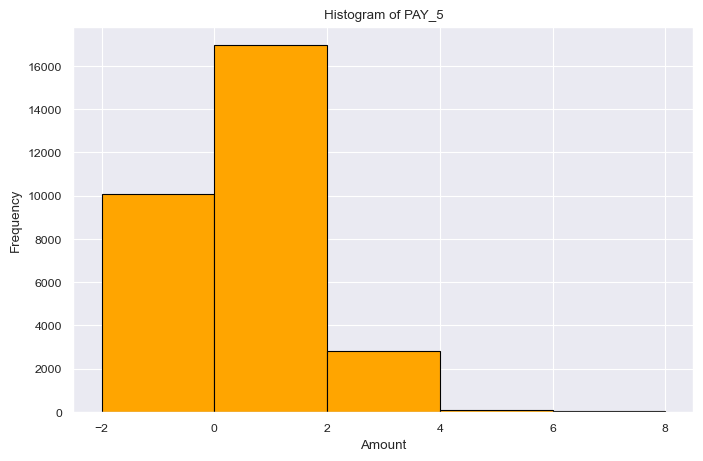

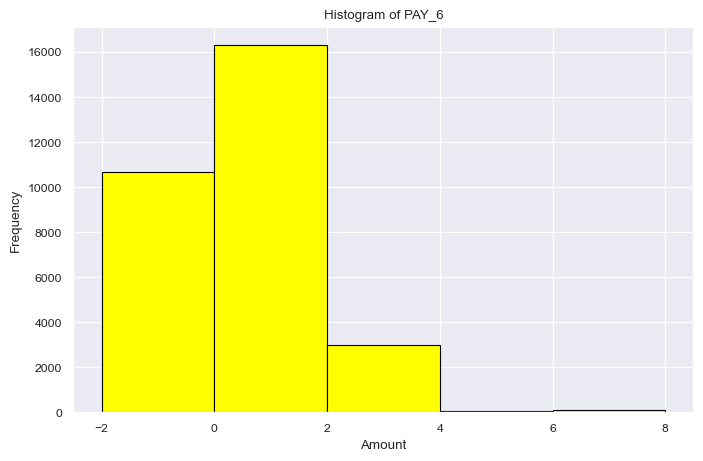

In [28]:
# <write your code here>
plt.figure(figsize=(8,5))
plt.hist(pay_df["PAY_1"],bins=5,color='blue',edgecolor='black')
plt.title("Histogram of PAY_1")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(pay_df["PAY_2"], bins=5,color='green',edgecolor='black')
plt.title("Histogram of PAY_2")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(pay_df["PAY_3"], bins=5,color='red',edgecolor='black')
plt.title("Histogram of PAY_3")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(pay_df["PAY_4"], bins=5,color='purple',edgecolor='black')
plt.title("Histogram of PAY_4")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(pay_df["PAY_5"], bins=5,color='orange',edgecolor='black')
plt.title("Histogram of PAY_5")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(pay_df["PAY_6"], bins=5,color='yellow',edgecolor='black')
plt.title("Histogram of PAY_6")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

##### What do you think about the obtained plot? Any transformation might be required?

\<write your answer here\>

as we have categorical (-1,0,1,2) transormation is not needed but maybe standarlizing (min-max or z_score) is required

##### 4) Age:
- Plot a histogram of the age feature ('AGE')

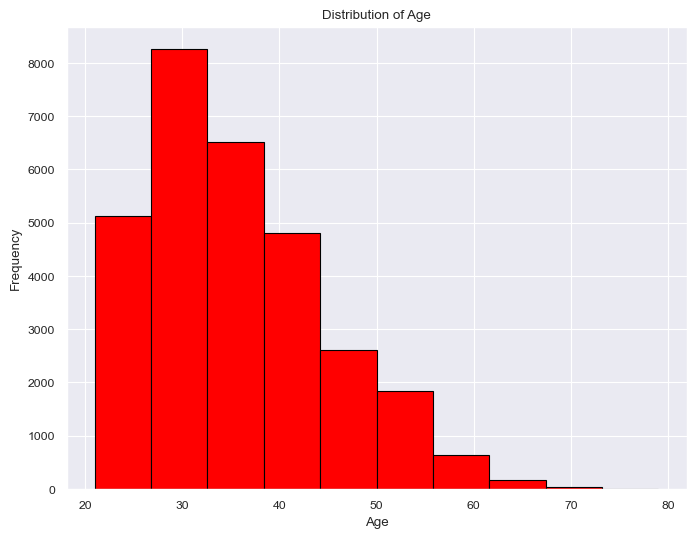

In [29]:
plt.figure(figsize=(8,6))
plt.hist(df["AGE"], bins=10,color='red',edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

##### What do you think about the obtained plot? Any transformation might be required?

\<write your answer here\>

this is a good distribution behaviour and no transformation is needed but we may concider standardizaton or normalization to scal the data

##### 5) Amount given in credit:

Plot a histogram of the age feature ('LIMIT_BAL')

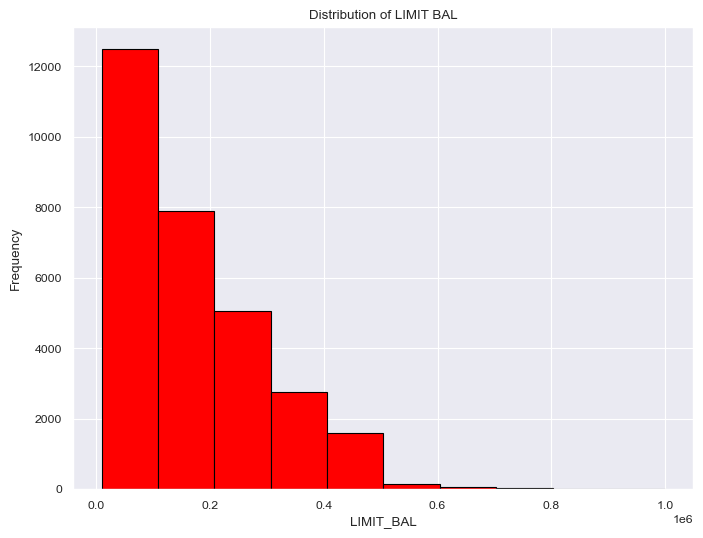

In [30]:
# <write your code here>
plt.figure(figsize=(8,6))
plt.hist(df["LIMIT_BAL"],bins=10, color='red',edgecolor='black')
plt.title('Distribution of LIMIT BAL')
plt.xlabel("LIMIT_BAL")
plt.ylabel("Frequency")
plt.show()

##### What do you think about the obtained plot? Any transformation might be required?

\<write your answer here\>


##### 6) Target column (Default):
- Extract the different categories of the default column and their value counts (hint: use value_counts)
- Store the dataframe in a separate variable
- Create a bar plot

In [31]:
# <write your code here>
default_count = df["default"].value_counts()
default_count
default_df = pd.DataFrame({"Default Category":default_count.index.tolist(),"Count":default_count.values })

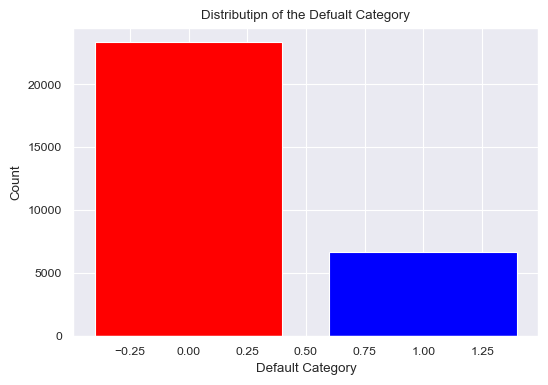

In [32]:
# <write your code here>
plt.figure(figsize=(6,4))
plt.bar(default_df["Default Category"],default_df["Count"],color=["red", "blue"])
plt.xlabel("Default Category")
plt.ylabel("Count")
plt.title("Distributipn of the Defualt Category")
plt.show()

##### What do you think about the obtained plot? Any transformation might be required?

\<write your answer here\>
no transformation or normalization is required gere

#### Correlation:
- Create a correlation plot for the different features in the original dataframe (hint: use sns.heatmap for the plot)

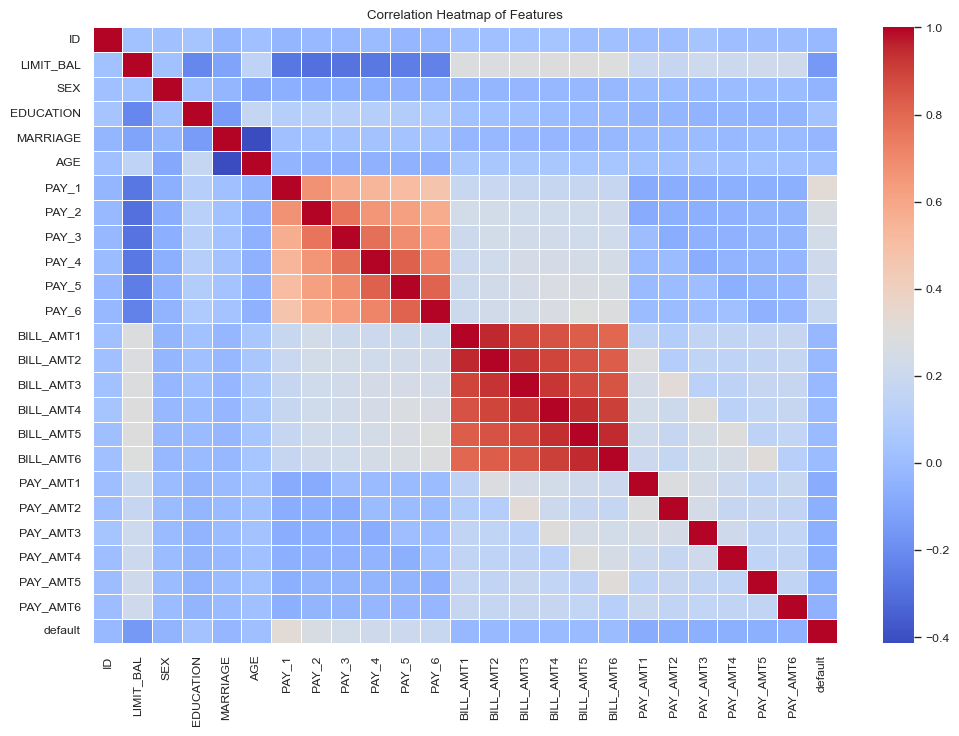

In [33]:
# <write your code here>
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

##### What do you think about the obtained plot? Any transformation might be required?

\<write your answer here\>

we have strong corr btwn BILL_AMT1 and BILL_AMT6, also btwn PAY_0 and PAY_6 
we have wee corr btwn the default column and most of the other features

-LIMIT_BALL, BILL_AMT and AGE  have large num range so we have to normalize them (minmax scaler or standard scaler)

-and we may concider PCA on the BILL_ATMs (1 to 6) adn PAYs (0 to 6) as they have strong corr


# 3. Data cleaning and further exploration: [3 points]

#### As you might have seen in the previous section of the project, there are some undocumented elements in some features, which means we don't really know what they mean

Therefore, we will start by cleaning them up!

##### 1) Replace the values 0, 5, and 6 by the value 4 (resembling the 'Other' category)

In [34]:
# <write your code here>
df['EDUCATION']=df['EDUCATION'].replace([3,5,6],4)
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
4     5371
0       14
Name: count, dtype: int64

##### 2) Replace the value 0 in MARRIAGE by 3 (resembling the 'Other' category)

In [35]:
# <write your code here>
df["MARRIAGE"]=df["MARRIAGE"].replace(0,3)
df["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

##### 3) Replace -1 and -2 by 0 in all the PAY_1 --> PAY_6
"-1" is paid duly, but there are "-2" and "0" labels in payment status variable. So let's combine them and put everything as "0"


In [36]:
# <write your code here>
to_replace_columns = ["PAY_1", "PAY_2", "PAY_3","PAY_4","PAY_5", "PAY_6"]
df[to_replace_columns] = df[to_replace_columns].replace([-1,-2], 0)
df["PAY_1"].value_counts()

PAY_1
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64

# 4) Baseline model: [4 points]

##### Create and evaluate a baseline model using KFold cross validation

1) Split the data into 70\% training and 30\% testing. Select the default as label

2) Create a Logistic Regression model with random_state=0. This model should be created on the resulting dataframe from the preprocessing without any fine tuning

3) Apply K-fold cross validation with cv=5 and train the model

4) evaluate the model by computing:
   - The accuracy
   - The confusion matrix

In [37]:
# <write your code here>
X=df.drop(columns=["default"])
y=df["default"]
X_train,X_test, y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [38]:
# <write your code here>
model=LogisticRegression(random_state=0, max_iter=500)
cv_scores=cross_val_score(model, X_train,y_train, cv=5,scoring="accuracy")
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=0)

In [39]:
# <write your code here>
y_pred=model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc



0.8048888888888889

In [40]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[6728,  312],
       [1444,  516]])

##### What do you think about this accuracy? Does it need improvement?

\<write your answer here\>
80% is not bad and not good so yes it needs improvement 

# 5. Feature Engineering [3 points]

##### 1) One hot encode all categorical features
- Convert the dtypes of 'SEX', 'MARRIAGE', and 'EDUCATION' to the dtype 'object'
- apply one hot encoding (hint: use the get_dummies function provided by pandas)

In [41]:
# <write your code here>
df["SEX"]=df["SEX"].astype(object)
df['MARRIAGE']=df['MARRIAGE'].astype(object)
df['EDUCATION']=df['EDUCATION'].astype(object)

df_encoded=pd.get_dummies(df, columns=['SEX','MARRIAGE','EDUCATION'])
df_encoded.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_4
0,1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,False,True,True,False,False,False,False,True,False
1,2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,False,True,False,True,False,False,False,True,False
2,3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,False,True,False,True,False,False,False,True,False
3,4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,False,True,True,False,False,False,False,True,False
4,5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,True,False,True,False,False,False,False,True,False


##### 2) Split the dataset between 70\% training and 30\% testing

In [42]:
# <write your code here>
X=df_encoded.drop(columns=['default'])
y=df_encoded['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

##### 3) Confirm class imbalance in the labels of the dataset

- Print the distribution of the labels in the train dataset

In [43]:
# <write your code here>
lc = y_train.value_counts()
lc

default
0    16324
1     4676
Name: count, dtype: int64

#### There's a lot of imbalance in the sample. So there are many ways to resampling!

### Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution. This is a simple and effective strategy for imbalanced classification problems.

### The simplest strategy is to choose examples for the transformed dataset randomly, called random resampling. There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

#### A) Random Oversampling: Randomly duplicate examples in the minority class.
#### B) Random Undersampling: Randomly delete examples in the majority class.
#### C) SMOTE: Synthetic Minority Oversampling Technique

#### Let's look at them, one by one

### A) Random Oversampling: [4 points]

#### Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

#### Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

#### To implement random oversampling, you need to use the resample function from the sklearn.utils package
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

- Implement random oversampling
- Store the resulting dataframe in a new variable

In [44]:
# <write your code here>
major_class = df_encoded[df_encoded['default'] == 0]
minor_class = df_encoded[df_encoded['default'] == 1]

minority_oversample = resample(minor_class,replace=True,n_samples=len(major_class),random_state=42)
oversample_df = pd.concat([major_class,minority_oversample])


### B) Random Undersampling: [4 points]

#### Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

#### This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

#### This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

#### To implement random undersampling, you need to use the resample function from the sklearn.utils package

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

- Implement random undersamping
- Store the resulting dataframe in a new variable

In [45]:
# <write your code here>
majority_undersample = resample(major_class,replace=True,n_samples=len(minor_class),random_state=42)
undersample_df=pd.concat([majority_undersample,minor_class])

### C) SMOTE: Synthetic Minority Oversampling Technique [4 points]

#### The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling. The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time

#### SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates synthetic (fake) samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model

#### To implement SMOTE, you need to use the SMOTE function from the imblearn package
Documentation: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
- Implement SMOTE samling
- Store the resulting dataframe in a new variable


In [46]:
# <write your code here>
smote=SMOTE(random_state=42)
X_resample,y_resample=smote.fit_resample(X, y)
resampled_df=pd.DataFrame(X_resample,columns=X.columns)
resampled_df['default']=y_resample
resampled_df.value_counts()

ID     LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  SEX_1  SEX_2  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  EDUCATION_0  EDUCATION_1  EDUCATION_2  EDUCATION_4  default
30000  50000.0    46   0      0      0      0      0      0      47929.0    48905.0    49764.0    36535.0    32428.0    15313.0    2078.0    1800.0    1430.0    1000.0    1000.0    1000.0    True   False  True        False       False       False        False        True         False        1          1
1      20000.0    24   2      2      0      0      0      0      3913.0     3102.0     689.0      0.0        0.0        0.0        0.0       689.0     0.0       0.0       0.0       0.0       False  True   True        False       False       False        False        True         False        1          1
2      120000.0   26   0      2      0      0      0      2      2682.0     1725.0     

# 6. Models Building, Training, and Evaluation [9 points]

#### At this point, we have 4 sets of training data:

#### 1) The normal train data with unbalance
#### 2) Train data with oversampling
#### 3) Train data with undersampling
#### 4) Train data with SMOTE algorithm

#### The evaluation will be based on K fold cross validation through the accuracy score

#### First let's define a function which evaluates the model with train and test score and also performs a K-fold cross validation on the train dataset

In [47]:
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    # algo is the machine learning algorithm
    from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

    # WITHOUT KFOLDS CROSS VALIDATION
    # <write your code: fit the training data to the model>
    algo.fit(Xtrain, ytrain)
    # <write your code: following training, perform prediction on the train data>
    ytrain_pred = algo.predict(Xtrain)

    # <write your code: print the training accuracy score>
    train_acc = accuracy_score(ytrain,ytrain_pred)
    print("train accuracy:")
    print(train_acc)

    # <write your code: perform prediction on the test data>
    ytest_pred = algo.predict(Xtest)

    # <write your code: print the testing accuracy score>
    test_acc = accuracy_score(ytest,ytest_pred)
    print("test accuarcy:")
    print(test_acc)
    # <write your code: print the classification report (hint: use classification_report())>
    print("classification report:")
    print(classification_report(ytest,ytest_pred))
    
    # WITH KFOLDS CROSS VALIDATION
    # Define the kfold cross validation with the following
    # parameters: n_splits=5, shuffle=True, random_state=42
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k, ytest_k = ytrain.iloc[train_idx], ytrain.iloc[test_idx]
        # <write your code: fit the train data of the fold to the model>
        algo.fit(xtrain_k, ytrain_k)

        # <write your code: perform prediction on the test data>
        ytest_k_pred =algo.predict(xtest_k)

        # <write your code: obtain the accuracy score>
        acc=accuracy_score(ytest_k, ytest_k_pred)
        score.append(acc)
   
    print('K-Fold scores: %0.03f' % (np.mean(score)))

## Model Building:

#### Your task is to use the following supervised machine learning algorithms with the 4 different datasets (normal, downsampling, upsampling, and smote) and also with hyperparameter tuning the models

#### i) Logistic Regression
#### ii) Naive Bayes
#### iii) K-Nearest Neighbours
#### iv) Decision Tree
#### v) Random Forest
#### vi) Support Vectore Machine

### We will be providing the code for the Logistic Regression model with some missing pieces. You can use it to inspire for writing the rest of the models

### i) Logistic Regression: [6 points]

#### Let's first find out the best parameters for all the datasets:

In [48]:
# You might need to change the name of the following dataframes (normal and sampled) 
# depending on whatever you named them before

xtrain_data = [X_train,oversample_df.drop('default',axis = 1),undersample_df.drop('default',axis = 1),X_resample]
ytrain_data = [y_train,oversample_df['default'],undersample_df['default'],y_resample]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    # <write your code: define the parameters to use the RandomizedSearchCV>
    param_grid={
        'C': sp_randint(1, 100),
        'penalty':['l1','l2'],
        'solver':['liblinear', 'saga'],
        'max_iter': [100, 200, 300, 400]
    }
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression()
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    # <write your code: fit the training data to the model>
    logreg_cv.fit(i,j)
    
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned Logistic Regression Parameters: {'C': 37, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Logistic Regression Parameters: {'C': 40, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Logistic Regression Parameters: {'C': 37, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Logistic Regression Parameters: {'C': 37, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
____________________________________________________________________________________________________


#### Model evaluation of logistic regression

In [ ]:
# Update the param log based on the best values obtained for each dataframe here. Here is an example.
param_log = [
    {'C': 37, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}, 
    {'C': 40, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'},  
    {'C': 37, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'},  
    {'C': 37, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}  
]

In [50]:
for X, y, method in zip(xtrain_data, ytrain_data, name):
    print(f"{method}: X shape {X.shape}, y shape {y.shape}")
# i got aValueError: Found input variables with inconsistent numbers of samples: [16800, 21000]
#so im making sure all the samples matches

Normal Sampling: X shape (21000, 30), y shape (21000,)
Over Sampling: X shape (46728, 30), y shape (46728,)
Under Sampling: X shape (13272, 30), y shape (13272,)
SMOTE: X shape (46728, 30), y shape (46728,)


In [51]:
xtrain_data = [X_train,oversample_df.drop('default',axis = 1),undersample_df.drop('default',axis = 1),X_resample]
ytrain_data = [y_train,oversample_df['default'],undersample_df['default'],y_resample]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(LogisticRegression(**param_log[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

Data is  Normal Sampling  And with hyper parameter  {'C': 37, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
train accuracy:
0.819047619047619
test accuarcy:
0.8165555555555556
classification report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.67      0.32      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.818
____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'C': 40, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
train accuracy:
0.701356788221195
test accuarcy:
0.7761111111111111
classification report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7040
           1       0.49      0.56      0.52      1960

    accur

### ii) Naive bayes:

In [ ]:
# <write your code here>
pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', GaussianNB())  
    ])


for i, j, k in zip(xtrain_data, ytrain_data, name):
    print('Data is', k)
    model_eval(pipeline, i, j, X_test, y_test)
    print("_" * 60)


Data is Normal Sampling
train accuracy:
0.37347619047619046
test accuarcy:
0.37422222222222223
classification report:
              precision    recall  f1-score   support

           0       0.88      0.23      0.37      7040
           1       0.24      0.89      0.38      1960

    accuracy                           0.37      9000
   macro avg       0.56      0.56      0.37      9000
weighted avg       0.74      0.37      0.37      9000

K-Fold scores: 0.380
____________________________________________________________
Data is Over Sampling
train accuracy:
0.54301489470981
test accuarcy:
0.32611111111111113
classification report:
              precision    recall  f1-score   support

           0       0.89      0.16      0.27      7040
           1       0.23      0.93      0.38      1960

    accuracy                           0.33      9000
   macro avg       0.56      0.54      0.32      9000
weighted avg       0.75      0.33      0.29      9000

K-Fold scores: 0.544
____________

### iii) K-Nearest Neighbours: 

In [54]:
for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    # <write your code: define the parameters to use the RandomizedSearchCV>
   
    param_grid={
       'model__n_neighbors': range(1, 50),
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan', 'minkowski'],
        'model__p': [1, 2]
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', KNeighborsClassifier())  
    ])

    # Instantiate a logistic regression classifier

    # Instantiate the RandomizedSearchCV object
    knn_cv = RandomizedSearchCV(pipeline, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    # <write your code: fit the training data to the model>
    knn_cv.fit(i,j)
    
    best_log.append(knn_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned knn Parameters: {}".format(knn_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned knn Parameters: {'model__weights': 'distance', 'model__p': 2, 'model__n_neighbors': 49, 'model__metric': 'manhattan'}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned knn Parameters: {'model__weights': 'distance', 'model__p': 2, 'model__n_neighbors': 49, 'model__metric': 'manhattan'}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned knn Parameters: {'model__weights': 'distance', 'model__p': 2, 'model__n_neighbors': 49, 'model__metric': 'manhattan'}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned knn Parameters: {'model__weights': 'distance', 'model__p': 1, 'model__n_neighbors': 34, 'model__metric': 'minkowski'}
____________________________________________________________________________________________________


In [55]:
param_log = [
    {'weights': 'distance', 'p': 2, 'n_neighbors': 49, 'metric': 'manhattan'}, 
    {'weights': 'distance', 'p': 2, 'n_neighbors': 49, 'metric': 'manhattan'},  
    {'weights': 'distance', 'p': 2, 'n_neighbors': 49, 'metric': 'manhattan'},  
    {'weights': 'distance', 'p': 1, 'n_neighbors': 34, 'metric': 'minkowski'}  
]

In [56]:
# <write your code here>
xtrain_data = [X_train,oversample_df.drop('default',axis = 1),undersample_df.drop('default',axis = 1),X_resample]
ytrain_data = [y_train,oversample_df['default'],undersample_df['default'],y_resample]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(KNeighborsClassifier(**param_log[l]), i,j,X_test,y_test)
    print("_" * 60)

Data is  Normal Sampling  And with hyper parameter  {'weights': 'distance', 'p': 2, 'n_neighbors': 49, 'metric': 'manhattan'}
train accuracy:
1.0
test accuarcy:
0.7843333333333333
classification report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      7040
           1       0.53      0.08      0.13      1960

    accuracy                           0.78      9000
   macro avg       0.66      0.53      0.50      9000
weighted avg       0.74      0.78      0.71      9000

K-Fold scores: 0.778
____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'weights': 'distance', 'p': 2, 'n_neighbors': 49, 'metric': 'manhattan'}
train accuracy:
1.0
test accuarcy:
0.9972222222222222
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7040
           1       1.00      0.99      0.99      1960

    accuracy           

### iv) Decision Tree

In [58]:
for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    # <write your code: define the parameters to use the RandomizedSearchCV>
    param_grid = {
        'model__max_depth': [5, 10, 100, None],
        'model__min_samples_split': [5, 10, 50],
        'model__min_samples_leaf': [3, 5, 4],
        'model__criterion': ['gini', 'entropy'],
        'model__max_features': ['sqrt', 'log2', None]
    }
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()), 
        ('model', DecisionTreeClassifier())  
    ])
    
    # Instantiate a logistic regression classifier

    # Instantiate the RandomizedSearchCV object
    ds_cv = RandomizedSearchCV(pipeline, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    # <write your code: fit the training data to the model>
    ds_cv.fit(i,j)
    
    best_log.append(ds_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned decision tree Parameters: {}".format(ds_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned decision tree Parameters: {'model__min_samples_split': 50, 'model__min_samples_leaf': 5, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__criterion': 'gini'}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned decision tree Parameters: {'model__min_samples_split': 50, 'model__min_samples_leaf': 5, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__criterion': 'gini'}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned decision tree Parameters: {'model__min_samples_split': 10, 'model__min_samples_leaf': 3, 'model__max_features': 'log2', 'model__max_depth': 10, 'model__criterion': 'gini'}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned decision tree Parameters: {'model__min_samples_split': 10, 'model__min_s

In [59]:
param_log = [
    {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}, 
    {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'},  
    {'min_samples_split': 10, 'min_samples_leaf':3, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'},  
    {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'} 
]

In [60]:
# <write your code here>
xtrain_data = [X_train,oversample_df.drop('default',axis = 1),undersample_df.drop('default',axis = 1),X_resample]
ytrain_data = [y_train,oversample_df['default'],undersample_df['default'],y_resample]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(DecisionTreeClassifier(**param_log[l]), i,j,X_test,y_test)
    print("_" * 60)

Data is  Normal Sampling  And with hyper parameter  {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}
train accuracy:
0.8067619047619048
test accuarcy:
0.7957777777777778
classification report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7040
           1       0.56      0.29      0.38      1960

    accuracy                           0.80      9000
   macro avg       0.69      0.61      0.63      9000
weighted avg       0.77      0.80      0.77      9000

K-Fold scores: 0.805
____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}
train accuracy:
0.6658962506420133
test accuarcy:
0.6334444444444445
classification report:
              precision    recall  f1-score   support

           0       0.89      0

### v) Random Forest

In [61]:
for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    # <write your code: define the parameters to use the RandomizedSearchCV>
    param_grid = {
        'model__n_estimators': [20, 50,100],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 4, 5],
    }

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()), 
        ('model', RandomForestClassifier())  
    ])
    # Instantiate a logistic regression classifier

    # Instantiate the RandomizedSearchCV object
    rf_cv = RandomizedSearchCV(pipeline, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    # <write your code: fit the training data to the model>
    rf_cv.fit(i,j)
    
    best_log.append(rf_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned random forest Parameters: {}".format(rf_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned random forest Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_depth': 10}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned random forest Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 4, 'model__max_depth': 15}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned random forest Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 4, 'model__max_depth': 5}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned random forest Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_depth': 5}
____________________________________________________________________________________________________


In [62]:
param_log = [
    {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}, 
    {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 15},  
    {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 5},  
    {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5} 
]

In [63]:
# <write your code here>
xtrain_data = [X_train,oversample_df.drop('default',axis = 1),undersample_df.drop('default',axis = 1),X_resample]
ytrain_data = [y_train,oversample_df['default'],undersample_df['default'],y_resample]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(RandomForestClassifier(**param_log[l]), i,j,X_test,y_test)
    print("_" * 60)

Data is  Normal Sampling  And with hyper parameter  {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
train accuracy:
0.8630476190476191
test accuarcy:
0.8203333333333334
classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

K-Fold scores: 0.818
____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 15}
train accuracy:
0.9119585687382298
test accuarcy:
0.9132222222222223
classification report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7040
           1       0.78      0.85      0.81      1960

    accuracy   

### vi) Support Vector Machine (SVM)

as i mentioned in the email, i tried many parameters and i try running it without tunning with fixed values but it still took too much time 


In [ ]:
for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    # <write your code: define the parameters to use the RandomizedSearchCV>
    param_grid = {
        'model__C': [0.001, 0.01,0.1, 1], 
        'model__kernel': ['linear', 'poly', 'sigmoid'],  
        'model__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
        'model__degree': [2, 3, 4, 5]
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', SVC())  
    ])
    # Instantiate a logistic regression classifier
    # Instantiate the RandomizedSearchCV object
    svc_cv = RandomizedSearchCV(pipeline, param_grid ,scoring = 'roc_auc', cv=5,  n_iter=10, random_state=0, n_jobs=-1)
    # Fit it to the data
    # <write your code: fit the training data to the model>
    svc_cv.fit(i,j)
    
    best_log.append(svc_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned svm Parameters: {}".format(svc_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling


KeyboardInterrupt: 

In [ ]:
svm_model=SVC(random_state=42,C=0.001,kernel='linear',gamma='scale')
for i, j, k in zip(xtrain_data, ytrain_data, name):
    print('Data is', k)
    model_eval(svm_model, i, j, X_test, y_test)
    print("_" * 60)

# 7) Conclusion:

### Conclude on the best model, the best parameter, and the best sampling approach used.

\<write your answer here\>
best model: 

well, KNN with MOSTE and over samling achived 1.0 (100%) train accuracy and about 100% test accuracy, this is a sign of overfitting and memorizing the training data completely.

so, the best model is Random Forest with Over Sampling:
train acc=0.912
test acc=0.913
k-fold=0.852

the train acc is higher than normal sampling so its learning more 

the test acc is still high that means the model is performing well

but the k-fold is lower than the test acc which may idicate some overfitting but not severe

the best parameter for this model was:

{'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 15}


